1. Lynxdata (2 points)
Lynxes seem to be related to a rather interesting phenomena that we will be examining more later. For now, download a Canadian dataset that describes the number of lynxes by year (the years are in the column 'year' and lynx count in the column 'lynx'). Find out the number of lynxes in the leap years of the 20th-century (1904,  1908,  1912,  1916,  1920,  1924,  1928 and 1932). In other words, write a program that prints out the number of lynxes for each of these years.

In [7]:
import numpy as np
lynx = np.genfromtxt("data/lynx.csv", names = True, delimiter = ",")

array([(1821.,  269.), (1822.,  321.), (1823.,  585.), (1824.,  871.),
       (1825., 1475.), (1826., 2821.), (1827., 3928.), (1828., 5943.),
       (1829., 4950.), (1830., 2577.), (1831.,  523.), (1832.,   98.),
       (1833.,  184.), (1834.,  279.), (1835.,  409.), (1836., 2285.),
       (1837., 2685.), (1838., 3409.), (1839., 1824.), (1840.,  409.),
       (1841.,  151.), (1842.,   45.), (1843.,   68.), (1844.,  213.),
       (1845.,  546.), (1846., 1033.), (1847., 2129.), (1848., 2536.),
       (1849.,  957.), (1850.,  361.), (1851.,  377.), (1852.,  225.),
       (1853.,  360.), (1854.,  731.), (1855., 1638.), (1856., 2725.),
       (1857., 2871.), (1858., 2119.), (1859.,  684.), (1860.,  299.),
       (1861.,  236.), (1862.,  245.), (1863.,  552.), (1864., 1623.),
       (1865., 3311.), (1866., 6721.), (1867., 4245.), (1868.,  687.),
       (1869.,  255.), (1870.,  473.), (1871.,  353.), (1872.,  784.),
       (1873., 1594.), (1874., 1676.), (1875., 2251.), (1876., 1426.),
      

In [56]:
lynx_leap = lynx["year"] % 4 == 0 
lynx_1900 = lynx["year"] >= 1900
lynx_1900leap = lynx_leap & lynx_1900
year_1900leap = lynx["year"][lynx_1900leap]
count_1900leap = lynx["lynxcount"][lynx_1900leap]
[(f"The year of {year_1900leap[k]} has {count_1900leap[k]} lynxes") for k in range(len(a))]

['The year of 1900.0 has 387.0 lynxes',
 'The year of 1904.0 has 6991.0 lynxes',
 'The year of 1908.0 has 345.0 lynxes',
 'The year of 1912.0 has 2713.0 lynxes',
 'The year of 1916.0 has 3790.0 lynxes',
 'The year of 1920.0 has 108.0 lynxes',
 'The year of 1924.0 has 2432.0 lynxes',
 'The year of 1928.0 has 529.0 lynxes',
 'The year of 1932.0 has 1590.0 lynxes']

2. Lynxplot (2 points)
Make a line plot, with the year on the x-axis and the number of lynxes on the y-axis.

Text(0, 0.5, 'Number of lynxes')

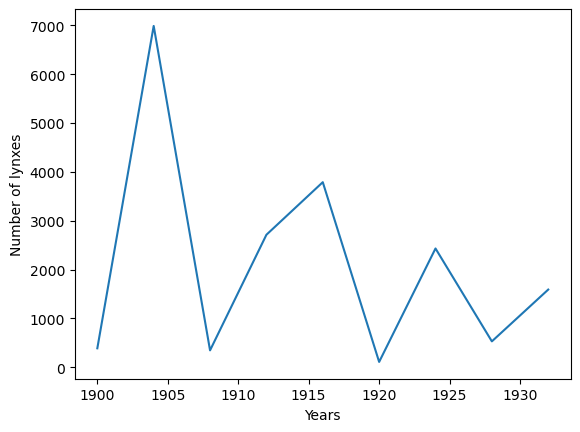

In [60]:
import matplotlib.pyplot as plt
plt.plot(year_1900leap, count_1900leap)
plt.xlabel("Years")
plt.ylabel("Number of lynxes")
plt.title("The number of lynxes in the leap years after 1900")

3. Z-normalization (2 points)
Write a function that z-normalizes a list of numbers. This means that our values are standardized so that the mean of our list is approximately 0 and the standard deviation is approximately 1.  You can do this by subtracting the mean from each value and then diving each result by the sample standard deviation.

You can calculate the mean and standard deviations however you see fit (for example, by using functions from the previous exercise sets or with numpy's pre-existing functions), but try to do the actual z-normalization (substraction by mean and division by sample standard deviation) without loops.

Chk. you can find an example illustration here.